In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Set your paths
data_dir = '/kaggle/input/casia-fasd/casia-fasd/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

def create_dataframe(data_dir, label):
    """
    Create a dataframe with file paths and labels.
    
    Args:
    data_dir (str): Directory with images.
    label (int): Label for the images in the directory.
    
    Returns:
    pd.DataFrame: Dataframe with columns 'file_path' and 'label'.
    """
    files = []
    for root, dirs, filenames in os.walk(data_dir):
        for filename in filenames:
            if filename.endswith(('jpg', 'jpeg', 'png')):
                files.append(os.path.join(root, filename))
    
    df = pd.DataFrame(files, columns=['file_path'])
    df['label'] = label
    return df

In [5]:
# Create dataframes for train and test data
df_train_live = create_dataframe(os.path.join(train_dir, 'live'), 1)
df_train_spoof = create_dataframe(os.path.join(train_dir, 'spoof'), 0)
df_test_live = create_dataframe(os.path.join(test_dir, 'live'), 1)
df_test_spoof = create_dataframe(os.path.join(test_dir, 'spoof'), 0)

In [ ]:
# Limit each dataframe to 1000 rows
df_train_live = df_train_live.head(2000)
df_train_spoof = df_train_spoof.head(2000)
df_test_live = df_test_live.head(200)
df_test_spoof = df_test_spoof.head(200)

In [6]:
print(df_test_live)

                                               file_path  label
0      /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
1      /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
2      /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
3      /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
4      /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
...                                                  ...    ...
10123  /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
10124  /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
10125  /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
10126  /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
10127  /kaggle/input/casia-fasd/casia-fasd/test/live/...      1

[10128 rows x 2 columns]


In [8]:
df_sample_user = df_test_live.copy()

In [9]:
df_sample_user

,file_path,label
0,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
1,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
2,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
3,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
4,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
...,...,...
10123,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
10124,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
10125,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1
10126,/kaggle/input/casia-fasd/casia-fasd/test/live/...,1


In [11]:
import re
# Function to extract the user ID from the file path
def extract_user_id(file_path):
    match = re.search(r's\d+', file_path)
    return match.group(0) if match else None

# Apply the function to extract user IDs
df_sample_user['user_id'] = df_sample_user['file_path'].apply(extract_user_id)

# Drop duplicates to keep only one row per unique user ID
unique_df = df_sample_user.drop_duplicates(subset='user_id')

# Drop the user_id column as it's no longer needed
unique_df = unique_df.drop(columns='user_id')

# Save the result to a new CSV file
unique_df.to_csv('sampled_photos.csv', index=False)

print(unique_df)

                                             file_path  label
0    /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
1    /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
2    /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
3    /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
7    /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
9    /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
12   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
13   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
14   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
15   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
17   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
18   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
21   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
26   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
32   /kaggle/input/casia-fasd/casia-fasd/test/live/...      1
35   /ka

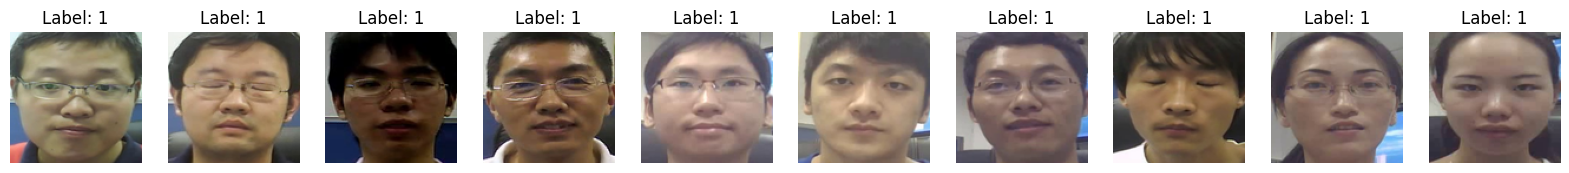

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

# Sample 10 rows from the unique user data
sample_df = unique_df.sample(n=10, replace=False)  # Adjust to sample up to 10 rows without replacement

# Function to load and display images
def show_images(df, n):
    fig, axes = plt.subplots(1, n, figsize=(20, 5))
    for ax in axes:
        ax.axis('off')  # Turn off axis for each subplot

    for i, (index, row) in enumerate(df.iterrows()):
        img = Image.open(row['file_path'])
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {row['label']}")
        axes[i].axis('off')
    
    plt.show()

# Show sample images
show_images(sample_df, min(10, len(sample_df)))

In [17]:
!mkdir photo_saved

In [21]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [20]:
!zip -r file.zip /kaggle/working/photo_saved

  adding: kaggle/working/photo_saved/ (stored 0%)
  adding: kaggle/working/photo_saved/s19v2f102.png (stored 0%)
  adding: kaggle/working/photo_saved/s14v2f106.png (stored 0%)
  adding: kaggle/working/photo_saved/s27v2f115.png (deflated 0%)
  adding: kaggle/working/photo_saved/s7v2f1.png (stored 0%)
  adding: kaggle/working/photo_saved/s13v1f166.png (stored 0%)
  adding: kaggle/working/photo_saved/s23v2f180.png (stored 0%)
  adding: kaggle/working/photo_saved/s15v2f60.png (deflated 0%)
  adding: kaggle/working/photo_saved/s5v1f113.png (stored 0%)
  adding: kaggle/working/photo_saved/s9v2f27.png (stored 0%)
  adding: kaggle/working/photo_saved/s28v1f167.png (stored 0%)
  adding: kaggle/working/photo_saved/s8v2f31.png (stored 0%)
  adding: kaggle/working/photo_saved/s4v1f64.png (stored 0%)
  adding: kaggle/working/photo_saved/s25v1f49.png (deflated 0%)
  adding: kaggle/working/photo_saved/s22v2f8.png (deflated 0%)
  adding: kaggle/working/photo_saved/s21v2f133.png (stored 0%)
  adding: k

In [19]:
import shutil
import os
# Define the destination folder
destination_folder = '/kaggle/working/photo_saved'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the sampled photos to the destination folder
for _, row in unique_df.iterrows():
    source_path = row['file_path']
    destination_path = os.path.join(destination_folder, os.path.basename(source_path))
    shutil.copy(source_path, destination_path)
    print(f"Copied {source_path} to {destination_path}")


Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s9v2f27.png to /kaggle/working/photo_saved/s9v2f27.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s15v2f60.png to /kaggle/working/photo_saved/s15v2f60.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s2v1f37.png to /kaggle/working/photo_saved/s2v1f37.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s14v2f106.png to /kaggle/working/photo_saved/s14v2f106.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s19v2f102.png to /kaggle/working/photo_saved/s19v2f102.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s1v1f146.png to /kaggle/working/photo_saved/s1v1f146.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s8v2f31.png to /kaggle/working/photo_saved/s8v2f31.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s23v2f180.png to /kaggle/working/photo_saved/s23v2f180.png
Copied /kaggle/input/casia-fasd/casia-fasd/test/live/s7v2f1.png to /kaggle/working/photo_saved/s7v2f1.png
Copied /kaggle

In [ ]:

# Concatenate dataframes
df_train = pd.concat([df_train_live, df_train_spoof], ignore_index=True)
df_test = pd.concat([df_test_live, df_test_spoof], ignore_index=True)

# Shuffle the dataframes
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Split train data into train and validation sets
df_train_sample, df_val_sample = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['label'])

# Print value counts for train, validation and test sets
print('Train set label distribution:')
print(df_train_sample['label'].value_counts())
print('\nValidation set label distribution:')
print(df_val_sample['label'].value_counts())
print('\nTest set label distribution:')
print(df_test['label'].value_counts())

In [ ]:
print(df_train[df_train['label']==0])

In [ ]:
import os
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
from sklearn.model_selection import train_test_split

In [ ]:
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image = Image.open(img_path).convert("RGB")
        label = self.dataframe.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = CustomDataset(df_train_sample, transform=train_transform)
val_dataset = CustomDataset(df_val_sample, transform=val_transform)
test_dataset = CustomDataset(df_test, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
train_dataset

In [ ]:
import copy

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=25, patience=5):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stop_counter = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    early_stop_counter = 0
                else:
                    early_stop_counter += 1
        
        if early_stop_counter >= patience:
            print("Early stopping")
            break

    print(f'Best val Acc: {best_acc:4f}')
    model.load_state_dict(best_model_wts)
    
    return model, train_losses, val_losses, train_accuracies, val_accuracies

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, criterion, optimizer, train_loader, val_loader, num_epochs=25, patience=5
)

torch.save(model.state_dict(), 'model.pth')

model.eval()
running_corrects = 0

for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
    
    running_corrects += torch.sum(preds == labels.data)

test_acc = running_corrects.double() / len(test_loader.dataset)
print(f'Test Acc: {test_acc:.4f}')



In [ ]:
import matplotlib.pyplot as plt

# Assuming train_losses, val_losses, train_accuracies, and val_accuracies are lists containing the respective metrics

# Visualization
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 4))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
# plt.subplot(1, 2, 2)
# plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
# plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

plt.show()